# Compare masses:
   * **catalog mass**: from particle data
   * **postage mass**: summed pixels mass map
   * **1D mass**: from surface brightness profile fit
   * **2D mass**: summed pixels within 30kpc aperture

In [1]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

import pickle


In [2]:
#open pickels
illustris_pickle='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris.pkl'
tng_pickle='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG.pkl'

pkl = open(illustris_pickle,'rb')  
illustris = pickle.load(pkl)  
pkl.close()

pkl = open(tng_pickle,'rb')  
tng = pickle.load(pkl)  
pkl.close()

In [3]:
def get_masses(array):
    cat_masses=np.array([i[1] for i in array])
    postage_masses=np.array([i[2] for i in array])
    oned_masses=np.array([i[0]['mag_tot'][0]/-2.5 for i in array])
    twod_masses=np.array([i[3] for i in array])
    
    return [cat_masses, postage_masses, oned_masses, twod_masses]

# Illustris

In [4]:
masses_illustris = get_masses(illustris)

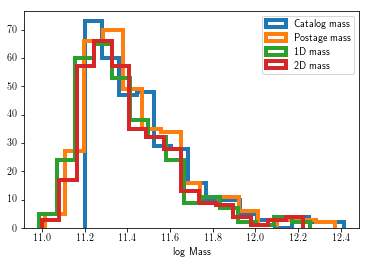

In [5]:
plt.hist(masses_illustris[0], bins=15, histtype='step', linewidth=4, label='Catalog mass')
plt.hist(masses_illustris[1], bins=15, histtype='step', linewidth=4, label='Postage mass')
plt.hist(masses_illustris[2], bins=15, histtype='step', linewidth=4, label='1D mass')
plt.hist(masses_illustris[3], bins=15, histtype='step', linewidth=4, label='2D mass')

plt.legend()
plt.xlabel('log Mass')
plt.show()

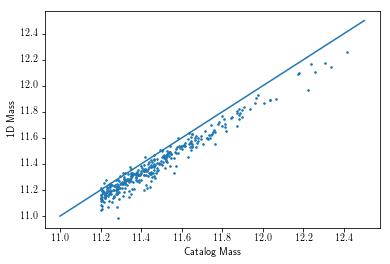

In [6]:
#mass vs. mass
plt.scatter(masses_illustris[0],masses_illustris[2], marker='.', s=10)
plt.plot([11,12.5],[11,12.5])
plt.xlabel('Catalog Mass')
plt.ylabel('1D Mass')
plt.show()

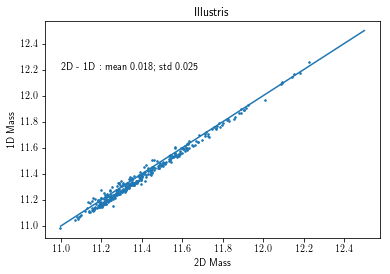

In [31]:
plt.scatter(masses_illustris[3],masses_illustris[2], marker='.', s=10)
plt.plot([11,12.5],[11,12.5])
plt.xlabel('2D Mass')
plt.ylabel('1D Mass')
plt.text(11,12.2,'2D - 1D : mean ' +str(round(np.mean(illustris_diff_2d_1d),3))+\
         '; std '+str(round(np.std(illustris_diff_2d_1d),3)))
plt.title('Illustris')
plt.show()

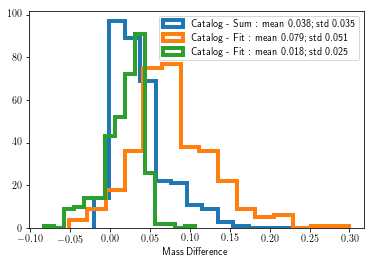

In [8]:
# differences
illustris_diff_cat_post=masses_illustris[0]-masses_illustris[1]
illustris_diff_cat_1d=masses_illustris[0]-masses_illustris[2]
illustris_diff_2d_1d=masses_illustris[3]-masses_illustris[2]

plt.hist(illustris_diff_cat_post, bins=15, histtype='step', linewidth=4,
         label='Catalog - Sum : mean ' +str(round(np.mean(illustris_diff_cat_post),3))+\
         '; std '+str(round(np.std(illustris_diff_cat_post),3)))
plt.hist(illustris_diff_cat_1d, bins=15, histtype='step', linewidth=4,
         label='Catalog - Fit : mean ' +str(round(np.mean(illustris_diff_cat_1d),3))+\
         '; std '+str(round(np.std(illustris_diff_cat_1d),3)))
plt.hist(illustris_diff_2d_1d, bins=15, histtype='step', linewidth=4,
         label='Catalog - Fit : mean ' +str(round(np.mean(illustris_diff_2d_1d),3))+\
         '; std '+str(round(np.std(illustris_diff_2d_1d),3)))

plt.legend()
plt.xlabel('Mass Difference')
plt.show()

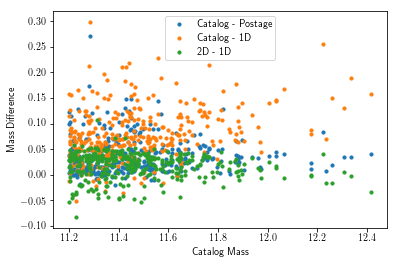

In [9]:
plt.scatter(masses_illustris[0],illustris_diff_cat_post, s=10, label='Catalog - Postage')
plt.scatter(masses_illustris[0],illustris_diff_cat_1d, s=10, label='Catalog - 1D')

plt.scatter(masses_illustris[0],illustris_diff_2d_1d, s=10, label='2D - 1D')

plt.legend()
plt.xlabel('Catalog Mass')
plt.ylabel('Mass Difference')
plt.show()

In [12]:
bins_cat= np.linspace(11.2, 12.5, 10)
db=(bins_cat[1]-bins_cat[0])/2.
bin_centers=bins_cat[:-1]+ db

#assign each mass to a bin
digitized = np.digitize(masses_illustris[0], bins_cat)

#means
bin_means_illustris_diff_cat_post = np.array([illustris_diff_cat_post[digitized == i].mean() for i in range(1,len(bins_cat))])
bin_means_illustris_diff_cat_1d = np.array([illustris_diff_cat_1d[digitized == i].mean() for i in range(1, len(bins_cat))])

#stds
bin_std_illustris_diff_cat_post = np.array([illustris_diff_cat_post[digitized == i].std() for i in range(1, len(bins_cat))])
bin_std_illustris_diff_cat_1d = np.array([illustris_diff_cat_1d[digitized == i].std() for i in range(1, len(bins_cat))])

# #change format to make plots of width
# new_bins=[]
# new_means_diff_cat_sum=[]
# for i, bini in enumerate(bin_centers):
#     new_bins.append(bini-db)
#     new_bins.append(bini)
#     new_bins.append(bini+db)
    
#     #append 3 times
#     new_means_diff_cat_sum.append(bin_means_illustris_diff_cat_sum[i])
#     new_means_diff_cat_sum.append(bin_means_illustris_diff_cat_sum[i])
#     new_means_diff_cat_sum.append(bin_means_illustris_diff_cat_sum[i])

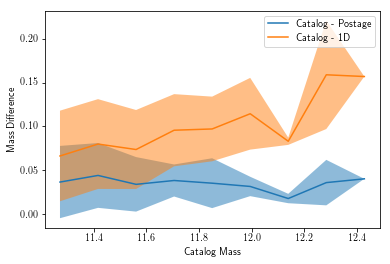

In [24]:
#plot
plt.plot(bin_centers,bin_means_illustris_diff_cat_post, label='Catalog - Postage')
plt.plot(bin_centers,bin_means_illustris_diff_cat_1d, label='Catalog - 1D')

plt.fill_between(bin_centers,bin_means_illustris_diff_cat_post-bin_std_illustris_diff_cat_post,
                bin_means_illustris_diff_cat_post+bin_std_illustris_diff_cat_post, alpha=0.5)
plt.fill_between(bin_centers,bin_means_illustris_diff_cat_1d-bin_std_illustris_diff_cat_1d,
                bin_means_illustris_diff_cat_1d+bin_std_illustris_diff_cat_1d, alpha=0.5)

# plt.scatter(masses_illustris[0],illustris_diff_cat_sum, s=10, label='Catalog - Sum')
# plt.scatter(masses_illustris[0],illustris_diff_cat_fit, s=10, label='Catalog - Fit')

plt.legend()
plt.xlabel('Catalog Mass')
plt.ylabel('Mass Difference')
plt.show()

# TNG

In [15]:
masses_tng = get_masses(tng)

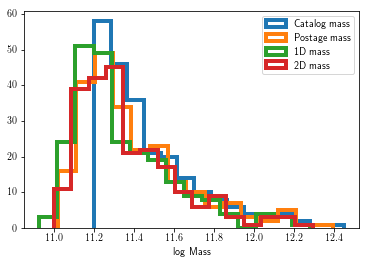

In [16]:
plt.hist(masses_tng[0], bins=15, histtype='step', linewidth=4, label='Catalog mass')
plt.hist(masses_tng[1], bins=15, histtype='step', linewidth=4, label='Postage mass')
plt.hist(masses_tng[2], bins=15, histtype='step', linewidth=4, label='1D mass')
plt.hist(masses_tng[3], bins=15, histtype='step', linewidth=4, label='2D mass')

plt.legend()
plt.xlabel('log Mass')
plt.show()

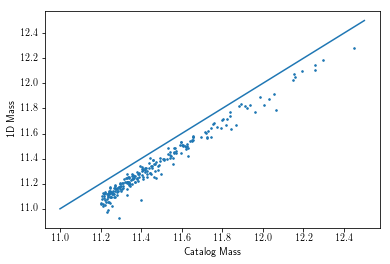

In [18]:
#mass vs. mass
plt.scatter(masses_tng[0],masses_tng[2], marker='.', s=10)
plt.plot([11,12.5],[11,12.5])
plt.xlabel('Catalog Mass')
plt.ylabel('1D Mass')
plt.show()

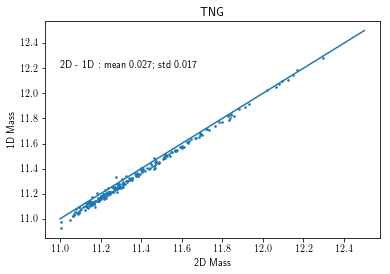

In [32]:
#mass vs. mass
plt.scatter(masses_tng[3],masses_tng[2], marker='.', s=10)
plt.plot([11,12.5],[11,12.5])
plt.xlabel('2D Mass')
plt.ylabel('1D Mass')
plt.text(11,12.2,'2D - 1D : mean ' +str(round(np.mean(tng_diff_2d_1d),3))+\
         '; std '+str(round(np.std(tng_diff_2d_1d),3)))
plt.title('TNG')
plt.show()

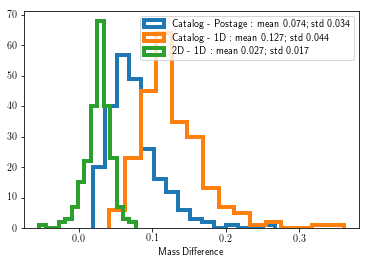

In [21]:
# differences
tng_diff_cat_post=masses_tng[0]-masses_tng[1]
tng_diff_cat_1d=masses_tng[0]-masses_tng[2]
tng_diff_2d_1d=masses_tng[3]-masses_tng[2]

plt.hist(tng_diff_cat_post, bins=15, histtype='step', linewidth=4,
         label='Catalog - Postage : mean ' +str(round(np.mean(tng_diff_cat_post),3))+\
         '; std '+str(round(np.std(tng_diff_cat_post),3)))
plt.hist(tng_diff_cat_1d, bins=15, histtype='step', linewidth=4,
         label='Catalog - 1D : mean ' +str(round(np.mean(tng_diff_cat_1d),3))+\
         '; std '+str(round(np.std(tng_diff_cat_1d),3)))
plt.hist(tng_diff_2d_1d, bins=15, histtype='step', linewidth=4,
         label='2D - 1D : mean ' +str(round(np.mean(tng_diff_2d_1d),3))+\
         '; std '+str(round(np.std(tng_diff_2d_1d),3)))

plt.legend()
plt.xlabel('Mass Difference')
plt.show()

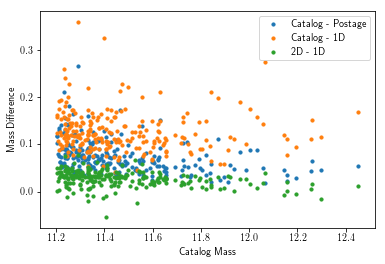

In [22]:
plt.scatter(masses_tng[0],tng_diff_cat_post, s=10, label='Catalog - Postage')
plt.scatter(masses_tng[0],tng_diff_cat_1d, s=10, label='Catalog - 1D')
plt.scatter(masses_tng[0],tng_diff_2d_1d, s=10, label='2D - 1D')

plt.legend()
plt.xlabel('Catalog Mass')
plt.ylabel('Mass Difference')
plt.show()

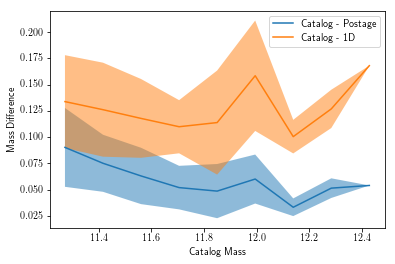

In [23]:
bins_cat= np.linspace(11.2, 12.5, 10)
db=(bins_cat[1]-bins_cat[0])/2.
bin_centers=bins_cat[:-1]+ db

#assign each mass to a bin
digitized = np.digitize(masses_tng[0], bins_cat)

#means
bin_means_tng_diff_cat_post = np.array([tng_diff_cat_post[digitized == i].mean() for i in range(1,len(bins_cat))])
bin_means_tng_diff_cat_1d = np.array([tng_diff_cat_1d[digitized == i].mean() for i in range(1, len(bins_cat))])

#stds
bin_std_tng_diff_cat_post = np.array([tng_diff_cat_post[digitized == i].std() for i in range(1, len(bins_cat))])
bin_std_tng_diff_cat_1d = np.array([tng_diff_cat_1d[digitized == i].std() for i in range(1, len(bins_cat))])

#plot
plt.plot(bin_centers,bin_means_tng_diff_cat_post, label='Catalog - Postage')
plt.plot(bin_centers,bin_means_tng_diff_cat_1d, label='Catalog - 1D')

plt.fill_between(bin_centers,bin_means_tng_diff_cat_post-bin_std_tng_diff_cat_post,
                bin_means_tng_diff_cat_post+bin_std_tng_diff_cat_post, alpha=0.5)
plt.fill_between(bin_centers,bin_means_tng_diff_cat_1d-bin_std_tng_diff_cat_1d,
                bin_means_tng_diff_cat_1d+bin_std_tng_diff_cat_1d, alpha=0.5)

# plt.scatter(masses_tng[0],tng_diff_cat_post, s=10, label='Catalog - post')
# plt.scatter(masses_tng[0],tng_diff_cat_1d, s=10, label='Catalog - 1d')

plt.legend()
plt.xlabel('Catalog Mass')
plt.ylabel('Mass Difference')
plt.show()